In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [2]:
#Importando a base
base= pd.read_csv('Mall_Customers_no_CustomersID.csv')
base.head(3)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6


In [3]:
#Realizando o pre processamento.
preprocessing=ColumnTransformer(
    [
        ('standart',StandardScaler(),['Age','Annual Income (k$)','Spending Score (1-100)']),
        ('onehot',OneHotEncoder(),['Gender'])
    ]
)
preprocessing.fit_transform(base)
base_scaled=pd.DataFrame(preprocessing.fit_transform(base),
                        columns=preprocessing.get_feature_names_out(),
                        )
base_scaled.head(3)

,standart__Age,standart__Annual Income (k$),standart__Spending Score (1-100),onehot__Gender_Female,onehot__Gender_Male
0,-1.424569,-1.738999,-0.434801,0.0,1.0
1,-1.281035,-1.738999,1.195704,0.0,1.0
2,-1.352802,-1.700830,-1.715913,1.0,0.0


In [4]:
#Realizando o processo de Pipeline
RANDOM_STATE=42
pipeline=Pipeline(
    [
        ('Preprocessing',preprocessing),
        ('Pca',PCA(n_components=3,random_state=RANDOM_STATE)),
        ('Clustering',KMeans(n_clusters=4,random_state=RANDOM_STATE, n_init=10))
    ]
)
pipeline.fit(base)

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('standart', StandardScaler(),
                                                  ['Age', 'Annual Income (k$)',
                                                   'Spending Score (1-100)']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['Gender'])])),
                ('Pca', PCA(n_components=3, random_state=42)),
                ('Clustering',
                 KMeans(n_clusters=4, n_init=10, random_state=42))])

In [5]:
#Guardando dados
import joblib
joblib.dump(pipeline,'pipeline_preprocessing_pca.pkl')

['pipeline_preprocessing_pca.pkl']

In [6]:
pipeline.get_feature_names_out()

array(['kmeans0', 'kmeans1', 'kmeans2', 'kmeans3'], dtype=object)

In [7]:
#Verificação dos cluster
pipeline['Clustering'].labels_

array([2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 1, 2, 2, 2, 0, 0, 0, 0, 2, 1, 3, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [8]:
#Criar o Dataframe com cluster.
base_clustered=base.copy()
base_clustered['cluster']=pipeline['Clustering'].labels_
base_clustered.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,2
3,Female,23,16,77,2
4,Female,31,17,40,2


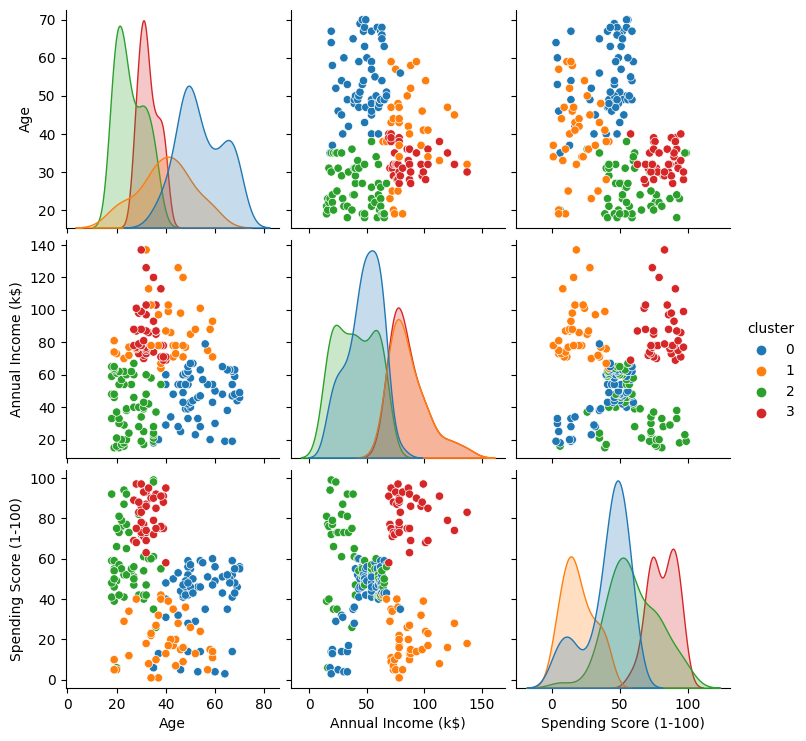

In [9]:
#Visualizando os graficos para encontrar os clusters.
sns.pairplot(base_clustered,diag_kind='kde',hue='cluster',palette='tab10');

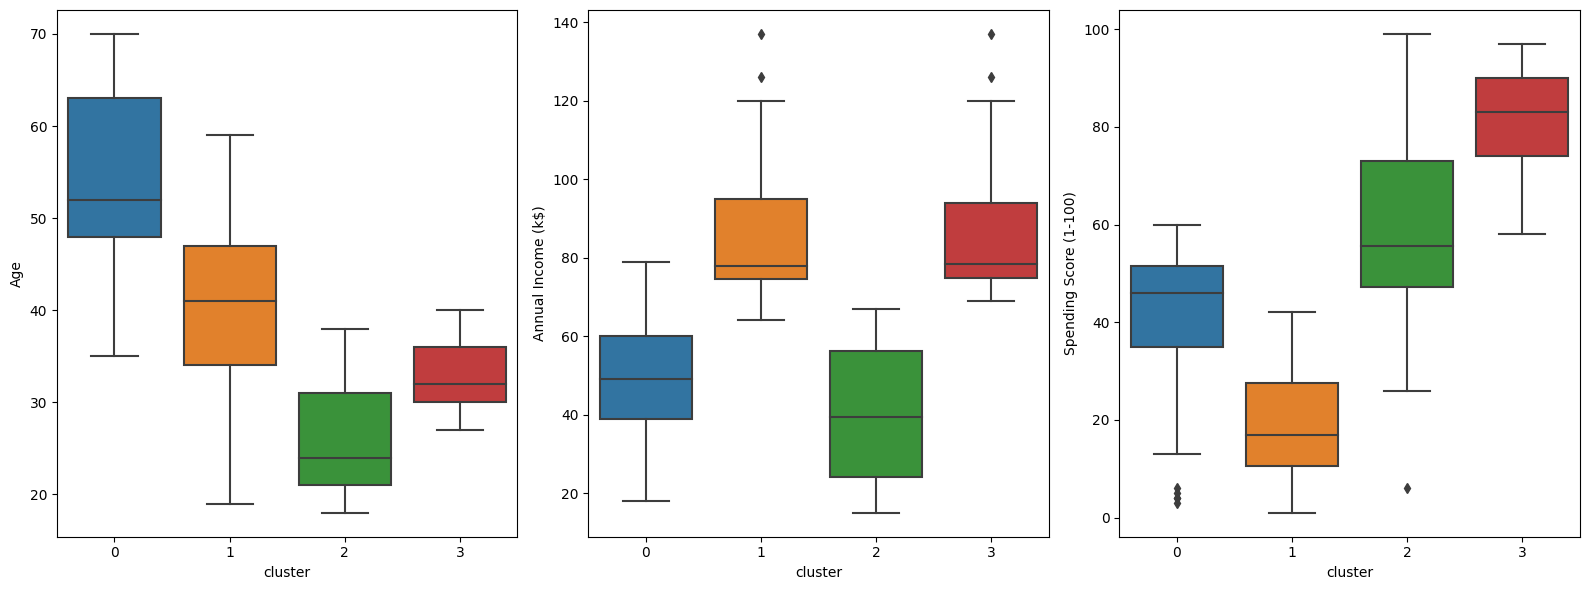

In [10]:
#Plotando os Clusters
fig, axs = plt.subplots(ncols= 3,figsize=(16,6),tight_layout=True)
for ax, col in zip(axs,base_clustered.select_dtypes('number')):
    sns.boxplot(data=base_clustered,x="cluster",y=col, ax=ax)
plt.show()

- Não é perceptivel grandes mudanças, tanto nos graficos de dispersão quanto nos boxplots.

In [11]:
#Verificando a quatidade de pontos por cluster
base_clustered['cluster'].value_counts().sort_index()

cluster
0    63
1    39
2    58
3    40
Name: count, dtype: int64

- Em relação ao tamanho dos clusters, exceto 1 (Cluster 0), todos tiveram alteração de tamanho.

In [12]:
#Verificando cluster por genero
base_clustered.groupby(['cluster','Gender']).size()

cluster  Gender
0        Female    36
         Male      27
1        Female    19
         Male      20
2        Female    35
         Male      23
3        Female    22
         Male      18
dtype: int64

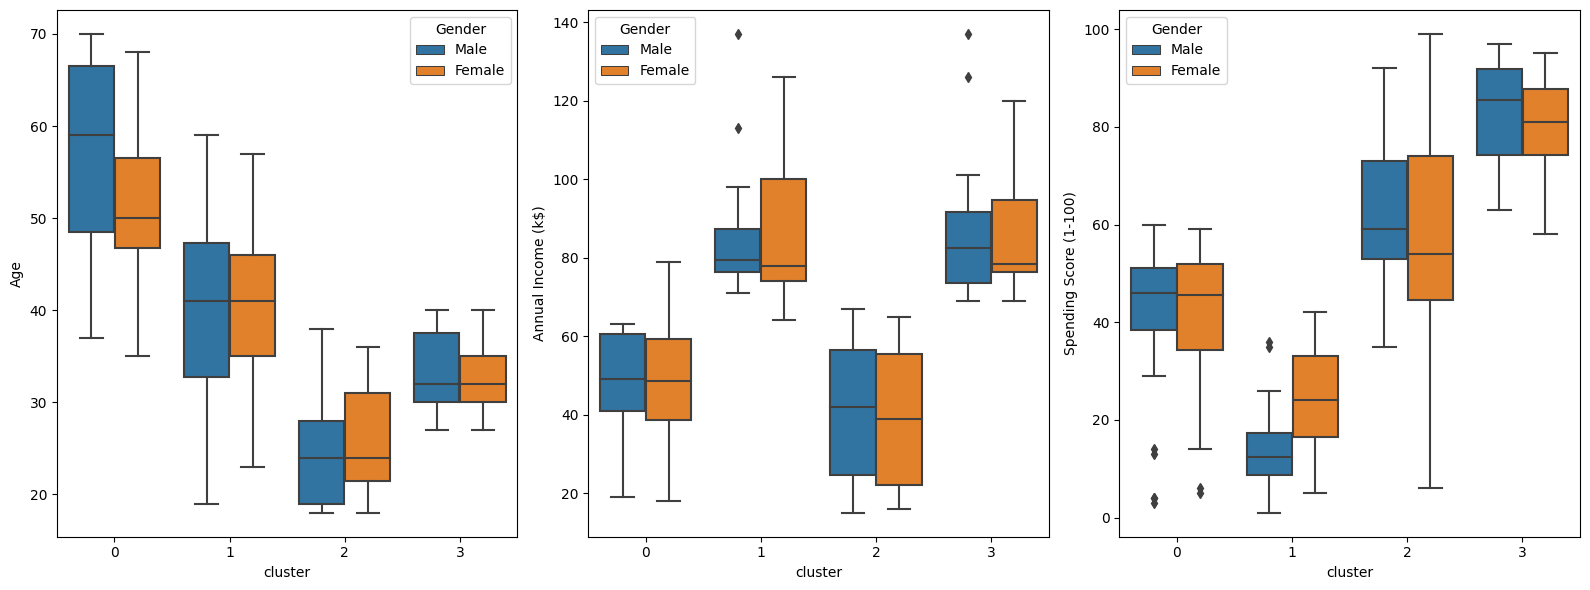

In [13]:
#Visualizando os Clusters por genero
fig, axs = plt.subplots(ncols= 3,figsize=(16,6),tight_layout=True)
for ax, col in zip(axs,base_clustered.select_dtypes('number')):
    sns.boxplot(data=base_clustered,x="cluster",y=col, ax=ax,hue='Gender')
plt.show()

In [14]:
#Recordando os nomes das colunas
pipeline['Preprocessing'].get_feature_names_out()

array(['standart__Age', 'standart__Annual Income (k$)',
       'standart__Spending Score (1-100)', 'onehot__Gender_Female',
       'onehot__Gender_Male'], dtype=object)

In [15]:
#Visualizando o components do Pca
pipeline['Pca'].components_

array([[ 0.70508424, -0.03921531, -0.70473508, -0.04830549,  0.04830549],
       [ 0.02024387,  0.996115  , -0.02730038, -0.05744471,  0.05744471],
       [-0.70661643, -0.00434967, -0.70753413,  0.00590595, -0.00590595]])

In [16]:
#Verificando a dimensionalidade
pipeline['Pca'].get_feature_names_out()

array(['pca0', 'pca1', 'pca2'], dtype=object)

In [17]:
#Guardando a variavel centroides
centroides=pipeline['Clustering'].cluster_centers_
centroides

array([[ 1.05594053, -0.46515952, -0.51334336],
       [ 0.86428392,  1.01369489,  0.7902107 ],
       [-0.90286757, -0.81796884,  0.41368228],
       [-1.19662519,  0.93032855, -0.56177895]])

In [18]:
#Criando base passando pelo pre processamento e pelo PCA
base_pca=pd.DataFrame(
    pipeline[:-1].fit_transform(base),
    columns=pipeline[:-1].get_feature_names_out()
)
base_pca.head()

,pca0,pca1,pca2
0,-0.575724,-1.684874,1.315210
1,-1.623595,-1.726481,0.060149
2,0.279614,-1.725314,2.182574
3,-1.511064,-1.796205,0.080242
4,-0.095468,-1.707347,0.690684


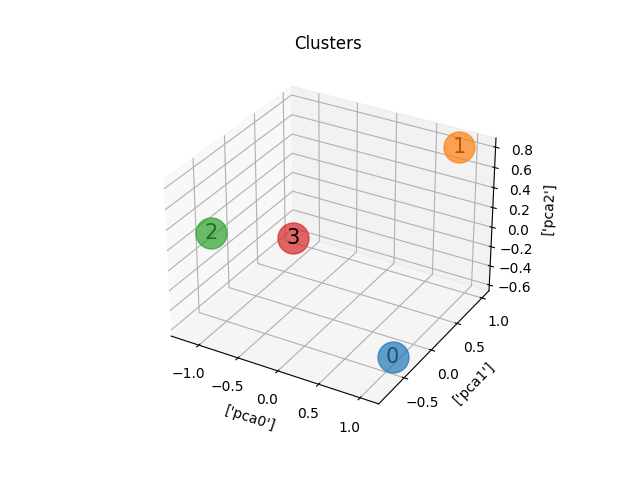

In [19]:
#Visualizando todos os centroides
%matplotlib ipympl
from Funcoes_auxiliares import visualizar_cluster
visualizar_cluster(
    dataframe=base_pca, 
    colunas=pipeline['Pca'].get_feature_names_out(),
    quantidade_cores=5,
    centroids=centroides
)

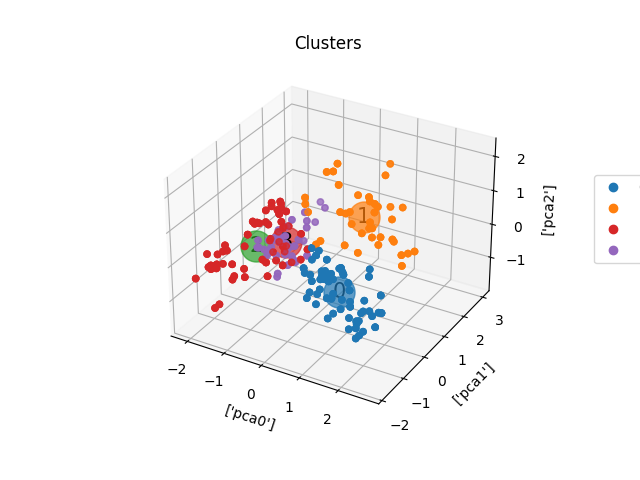

In [20]:
#Visualizando todos os pontos
%matplotlib ipympl
from Funcoes_auxiliares import visualizar_cluster
visualizar_cluster(
    dataframe=base_pca, 
    colunas=pipeline['Pca'].get_feature_names_out(),
    quantidade_cores=5,
    centroids=centroides,
    mostrar_pontos=True,
    coluna_clusters=base_clustered['cluster']
)